<a href="https://colab.research.google.com/github/Emrekorkmz0/ecg_feature_extraction_autoencoder/blob/main/ecg_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, gc, zipfile
import numpy as np, pandas as pd
from PIL import Image
import matplotlib.pyplot as plt


PATH = '/content/drive/MyDrive/ALL_COLAB_FİLES/ECG_Image_data/train'
IMAGES = os.listdir(PATH)
print('There are',len(IMAGES),'images. Here are 6 example foldersnames:')
print(IMAGES[:6])

There are 6 images. Here are 6 example foldersnames:
['N', 'F', 'Q', 'M', 'S', 'V']


In [2]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,Flatten,Dropout,Conv2DTranspose
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import ImageDataGenerator # Original line


BATCH_SIZE = 128; EPOCHS = 50
train_datagen = ImageDataGenerator(rescale=1./255)
train_batches = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/ALL_COLAB_FİLES/ECG_Image_data/train',
    target_size=(64, 64),
    shuffle=True,
    class_mode='input',
    batch_size=BATCH_SIZE
)

Found 30988 images belonging to 6 classes.


In [3]:
from tensorflow.keras.callbacks import EarlyStopping
# ENCODER
input_img = Input(shape=(64, 64, 3))  # Input shape (64, 64, 3)
x = Conv2D(48, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(96, (3, 3), activation='relu',  padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(192, (3, 3), activation='relu',  padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.3)(x)  # Regularization
# Daha büyük latent uzay boyutu
encoded = Conv2D(64, (1, 1), activation='relu', padding='same')(x)  # 64 filtre

# LATENT SPACE
direct_input = Input(shape=(8, 8, 64))  # Shape of the latent space

#Decoder
x = Conv2DTranspose(192, (3, 3), activation='relu', padding='same', strides=(2, 2))(direct_input)
x = Conv2DTranspose(96, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
x = Conv2DTranspose(48, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # Sigmoid for normalization

# COMPILE
encoder = Model(input_img, encoded)
decoder = Model(direct_input, decoded)
autoencoder = Model(input_img, decoder(encoded))

autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')


# Early stopping
early_stop = EarlyStopping(monitor='loss', patience=3)  # Sabır arttırıldı


In [ ]:
history = autoencoder.fit(train_batches,
        steps_per_epoch = train_batches.samples // BATCH_SIZE,
        epochs = EPOCHS, verbose=2, callbacks=[early_stop])


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


242/242 - 8402s - 35s/step - loss: 0.0747
Epoch 2/50
242/242 - 0s - 306us/step - loss: 0.0315
Epoch 3/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


242/242 - 115s - 474ms/step - loss: 0.0251
Epoch 4/50
242/242 - 0s - 320us/step - loss: 0.0210
Epoch 5/50
242/242 - 116s - 478ms/step - loss: 0.0199
Epoch 6/50
242/242 - 0s - 298us/step - loss: 0.0192
Epoch 7/50
242/242 - 143s - 590ms/step - loss: 0.0176
Epoch 8/50
242/242 - 0s - 309us/step - loss: 0.0168
Epoch 9/50
242/242 - 117s - 483ms/step - loss: 0.0160
Epoch 10/50
242/242 - 0s - 298us/step - loss: 0.0153
Epoch 11/50
242/242 - 116s - 478ms/step - loss: 0.0149
Epoch 12/50
242/242 - 0s - 292us/step - loss: 0.0137
Epoch 13/50
242/242 - 115s - 475ms/step - loss: 0.0141
Epoch 14/50
242/242 - 0s - 316us/step - loss: 0.0142
Epoch 15/50
242/242 - 141s - 583ms/step - loss: 0.0134
Epoch 16/50
242/242 - 0s - 310us/step - loss: 0.0136
Epoch 17/50
242/242 - 142s - 588ms/step - loss: 0.0127
Epoch 18/50
242/242 - 0s - 312us/step - loss: 0.0126
Epoch 19/50
242/242 - 116s - 478ms/step - loss: 0.0122
Epoch 20/50
242/242 - 0s - 311us/step - loss: 0.0118
Epoch 21/50
242/242 - 115s - 474ms/step - loss

In [ ]:
# Save the autoencoder model, not the history object
autoencoder.save('/content/drive/MyDrive/ALL_COLAB_FİLES/auto_encoder3.keras')

In [ ]:
# Save encoder and decoder models separately
encoder.save('/content/drive/MyDrive/ALL_COLAB_FİLES/encoder_model.keras')
decoder.save('/content/drive/MyDrive/ALL_COLAB_FİLES/decoder_model.keras')


In [4]:
from keras.models import load_model

# Load the autoencoder model
autoencoder = load_model('/content/drive/MyDrive/ALL_COLAB_FİLES/auto_encoder2.keras')
encoder = load_model('/content/drive/MyDrive/ALL_COLAB_FİLES/encoder_model.keras')
decoder = load_model('/content/drive/MyDrive/ALL_COLAB_FİLES/decoder_model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step


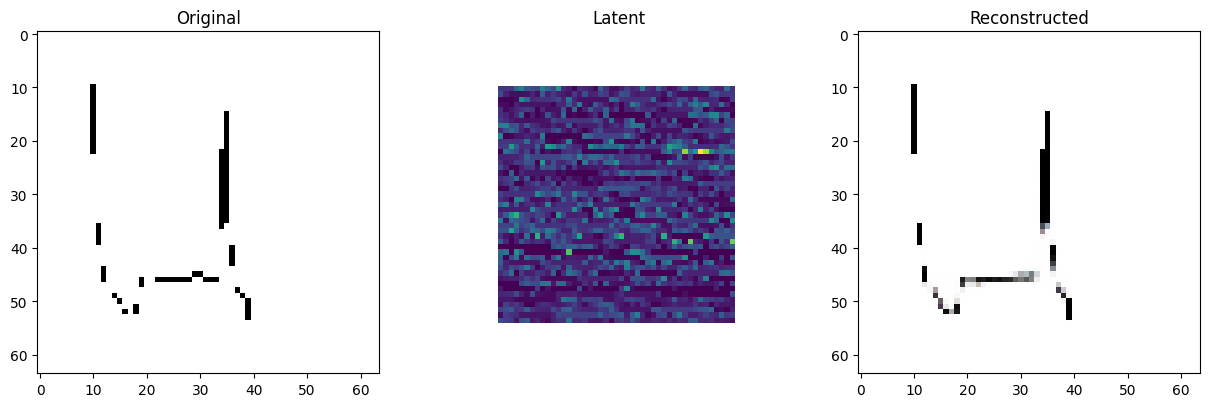

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


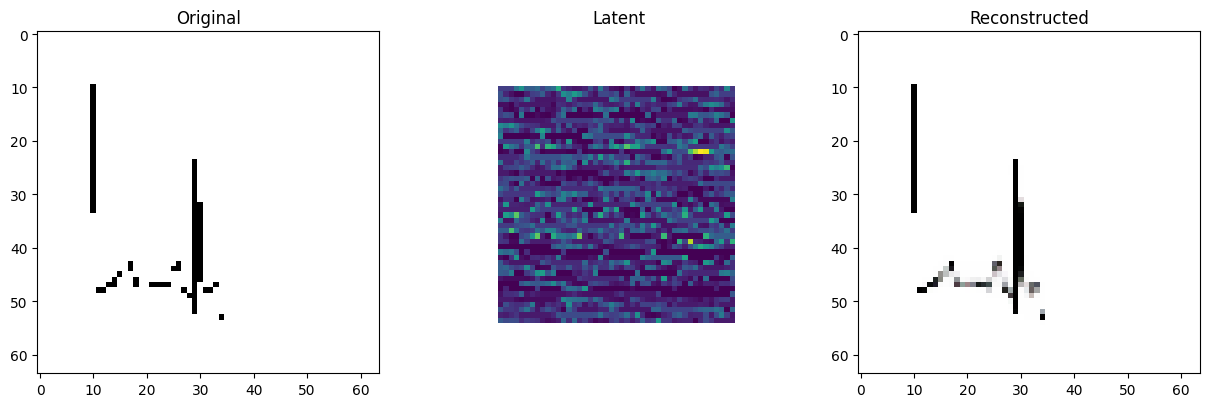

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


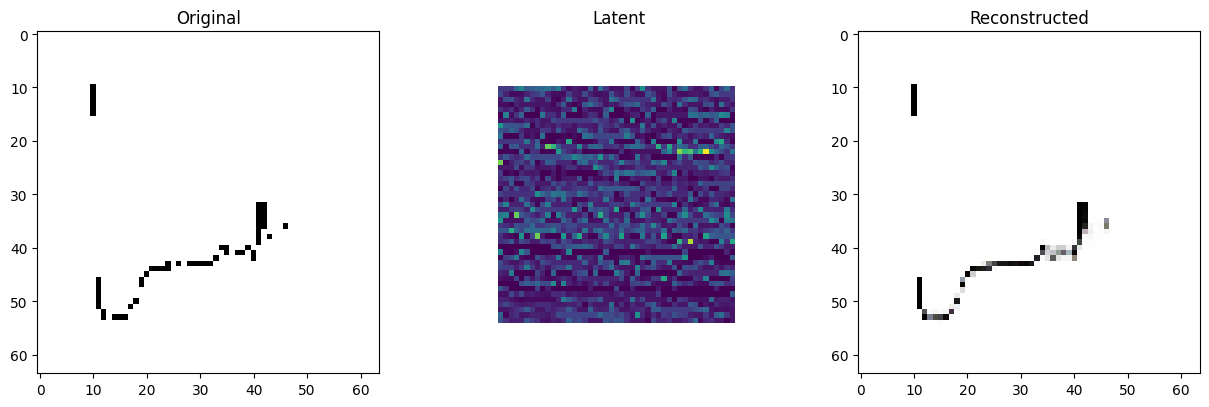

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


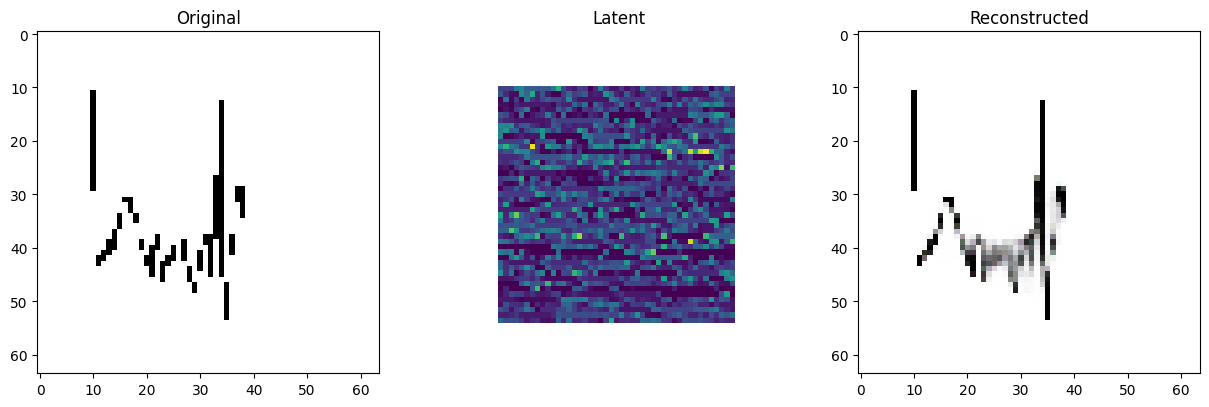

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


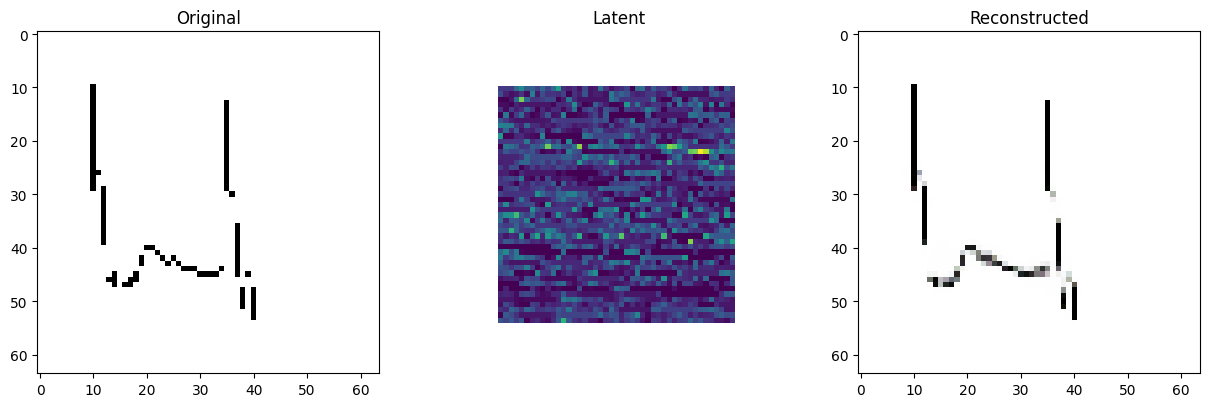

In [7]:
images = next(iter(train_batches))[0]
for i in range(5):

    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)

    # ORIGINAL IMAGE
    orig = images[i,:,:,:].reshape((-1,64,64,3))
    img = Image.fromarray( (255*orig).astype('uint8').reshape((64,64,3)))
    plt.title('Original')
    plt.imshow(img)

    # LATENT IMAGE
    latent_img = encoder.predict(orig)
    mx = np.max( latent_img[0] )
    mn = np.min( latent_img[0] )
    latent_flat = ((latent_img[0] - mn) * 255/(mx - mn)).flatten(order='F')
    img = Image.fromarray( latent_flat[:2025].astype('uint8').reshape((45,45)), mode='L')
    plt.subplot(1,3,2)
    plt.title('Latent')
    plt.xlim((-10,55))
    plt.ylim((-10,55))
    plt.axis('off')
    plt.imshow(img)

    # RECONSTRUCTED IMAGE
    decoded_imgs = decoder.predict(latent_img[0].reshape((-1,direct_input.shape[1],direct_input.shape[2],direct_input.shape[3]))) # Use .shape for KerasTensor
    img = Image.fromarray( (255*decoded_imgs[0]).astype('uint8').reshape((64,64,3)))
    plt.subplot(1,3,3)
    plt.title('Reconstructed')
    plt.imshow(img)

    plt.show()

In [8]:
# CREATE 100 CROPPED IMAGES
x = np.random.choice(np.arange(len(IMAGES)), 10, replace=True) # replace=True allows sampling with replacement
images = np.zeros((10, 64, 64, 3))
for i in range(len(x)):
    # Get the directory path
    dir_path = os.path.join(PATH, IMAGES[x[i]])

    # Get a list of image files in the directory
    image_files = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))]

    # Choose a random image file from the directory
    if image_files:  # Check if directory is not empty
        image_file = np.random.choice(image_files)
        img = Image.open(os.path.join(dir_path, image_file))
        # Replace Image.ANTIALIAS with Image.Resampling.LANCZOS
        img = img.resize((100, int(img.size[1] / (img.size[0] / 100))), Image.Resampling.LANCZOS)
        img = img.crop((18, 0, 82, 64))

        # Convert the image to RGB if it's grayscale
        if img.mode == 'L':
            img = img.convert('RGB')  # Convert to 3 channels

        images[i, :, :, :] = np.asarray(img).astype('float32') / 255.
    else:
        print(f"Directory {dir_path} is empty. Skipping.")

# CALCULATE ELLIPSOID FROM 100 IMAGES
encoded_imgs = encoder.predict(images)
sz = direct_input.shape[1] * direct_input.shape[2] * direct_input.shape[3] # Use .shape for KerasTensor
encoded_imgs = encoded_imgs.reshape((-1,sz))
mm = np.mean(encoded_imgs,axis=0)
ss = np.cov(encoded_imgs,rowvar=False)

# GENERATE 9 RANDOM ECG IMAGES
# Assuming latentSize is defined elsewhere and contains the correct dimensions
generated = np.random.multivariate_normal(mm,ss,9)
generated = generated.reshape((-1, direct_input.shape[1], direct_input.shape[2], direct_input.shape[3]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


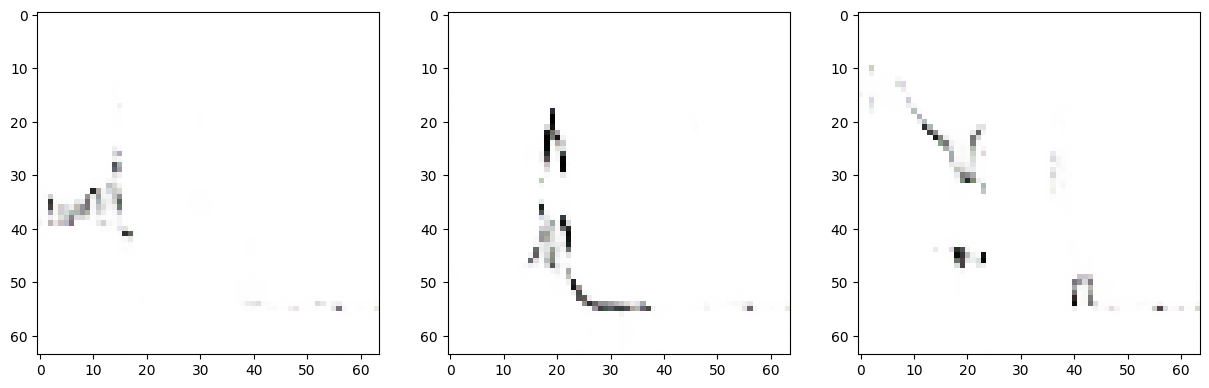

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


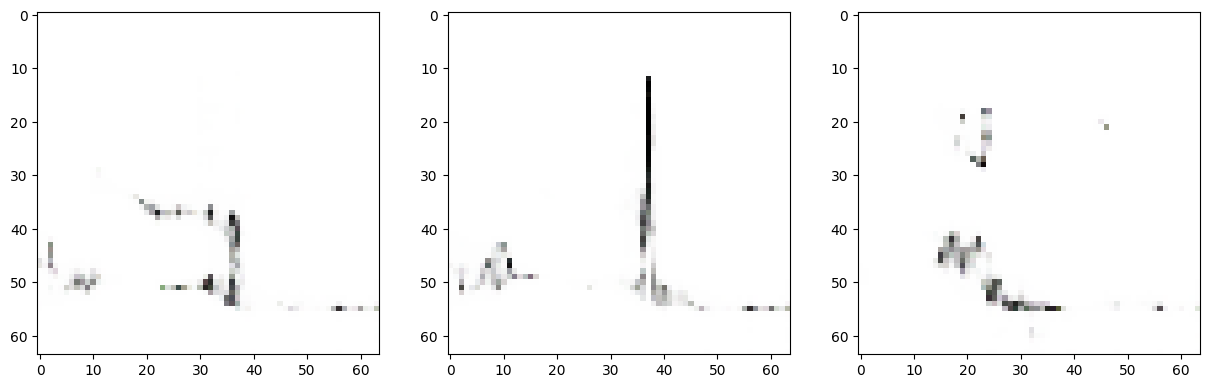

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


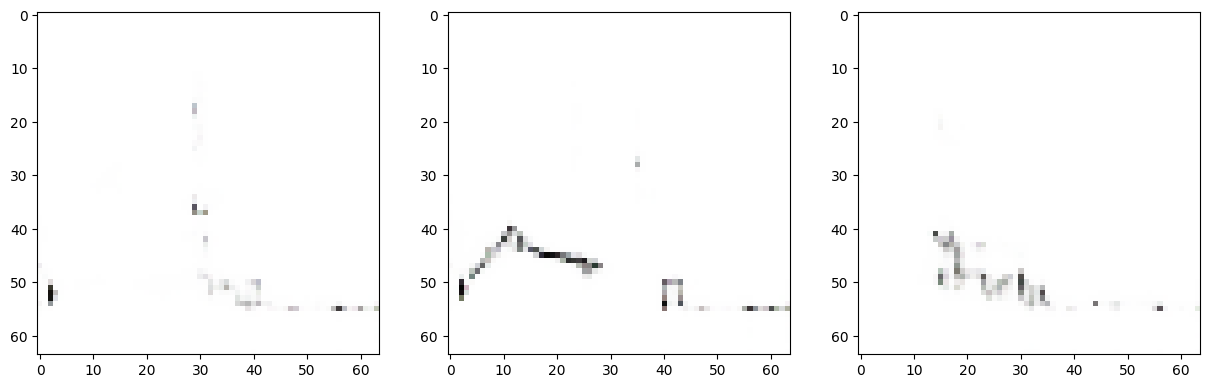

In [9]:
# PLOT 9 RANDOM DOG IMAGES
for k in range(3):
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    # Get the shape of the direct_input tensor
    input_shape = direct_input.shape
    # Reshape using the numerical dimensions
    decoded_imgs = decoder.predict(generated[k*3].reshape((-1, input_shape[1], input_shape[2], input_shape[3])))
    img = Image.fromarray( (255*decoded_imgs[0]).astype('uint8').reshape((64,64,3)))
    plt.imshow(img)
    plt.subplot(1,3,2)
    # Reshape using the numerical dimensions
    decoded_imgs = decoder.predict(generated[k*3+1].reshape((-1, input_shape[1], input_shape[2], input_shape[3])))
    img = Image.fromarray( (255*decoded_imgs[0]).astype('uint8').reshape((64,64,3)))
    plt.imshow(img)
    plt.subplot(1,3,3)
    # Reshape using the numerical dimensions
    decoded_imgs = decoder.predict(generated[k*3+2].reshape((-1, input_shape[1], input_shape[2], input_shape[3])))
    img = Image.fromarray( (255*decoded_imgs[0]).astype('uint8').reshape((64,64,3)))
    plt.imshow(img)
    plt.show()

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Model


In [11]:

# 1. LATENT VECTORS VE LABELS (ETİKETLERİ) HAZIRLA
latent_vectors = []  # Latent vektörleri sakla
labels = []  # Etiketleri sakla

# Get the total number of samples in the dataset
total_samples = train_batches.samples

# Iterate over batches of data
for i in range(total_samples // BATCH_SIZE + 1):  # Iterate over all batches
    images, labels_raw = next(iter(train_batches))  # Görseller ve etiketler (örneğin labels_raw ekg N sınıfı ile ilgili olabilir)

    # Extract latent vectors for the batch
    batch_latent_vectors = encoder.predict(images)
    latent_vectors.extend(batch_latent_vectors.reshape(batch_latent_vectors.shape[0], -1))  # Flatten and extend

    # In this case, labels_raw represents the input images themselves (autoencoder)
    # Assuming you have class labels available in train_batches.classes,
    # use them as labels
    batch_labels = train_batches.classes[i * BATCH_SIZE : (i + 1) * BATCH_SIZE]
    labels.extend(batch_labels)

latent_vectors = np.array(latent_vectors)
labels = np.array(labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━

In [13]:
print(latent_vectors)
print(labels)

[[1.2865518 1.7276669 0.6485978 ... 1.3168445 2.4574137 1.2751961]
 [1.6817088 2.179114  1.7897371 ... 1.3168445 2.4574137 1.2751961]
 [1.6817083 2.1791131 1.7897325 ... 1.3168441 2.4574137 1.2751961]
 ...
 [1.6817083 2.1791131 1.7897325 ... 1.3168445 2.4574137 1.2751961]
 [1.6817081 2.179115  1.7897326 ... 1.3168445 2.4574137 1.2751961]
 [1.286551  1.727667  0.6485972 ... 1.3168445 2.4574137 1.2751961]]
[0 0 0 ... 5 5 5]


In [14]:
print(latent_vectors.shape)
print(labels.shape)

(30988, 4096)
(30988,)


In [15]:
# 2. TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(latent_vectors, labels, test_size=0.2, random_state=42)

# 3. TRAIN
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)  # Use X_train and y_train, not y_train and y_test



RandomForestClassifier(random_state=42)

In [16]:
# 4. DOĞRULAMA
y_pred = classifier.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.24830590513068732


In [17]:
from sklearn.metrics import accuracy_score, f1_score # Import f1_score
f1=f1_score(y_test, y_pred, average='weighted')
print("F1 Score: ",f1)

F1 Score:  0.21216965002592394


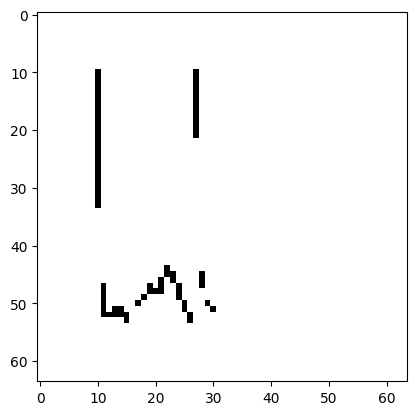

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
predicted:  4


In [33]:
# 5. TEST RESMİ ÜZERİNDE KULLANIM
test_image = images[0]  # Test resmi
plt.imshow(test_image)
plt.show()
latent_vector = encoder.predict(test_image.reshape(1, 64, 64, 3)).flatten()  # Latent space vektörü
prediction = classifier.predict(latent_vector.reshape(1, -1))  # Tahmin
# Use range to iterate over the length of the prediction array
for i in range(len(prediction)):

    print("predicted: ", prediction[i])
